In [4]:
import medlatin
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [2]:
# load the style vectors from csv files
medlatin_tfidf = np.genfromtxt('csvfiles/tfidf_n2_r100.csv', delimiter=',')
medlatin_emb = np.genfromtxt('csvfiles/embeddings.csv', delimiter=',')

with open('csvfiles/author_changes_names.txt', 'r', encoding='utf-8') as f:
    author_names = [name.strip() for name in f.readlines()]

with open('csvfiles/author_changes_idx.txt', 'r', encoding='utf-8') as f:
    author_idx = [int(idx.strip()) for idx in f.readlines()]

### Show pairwise distances

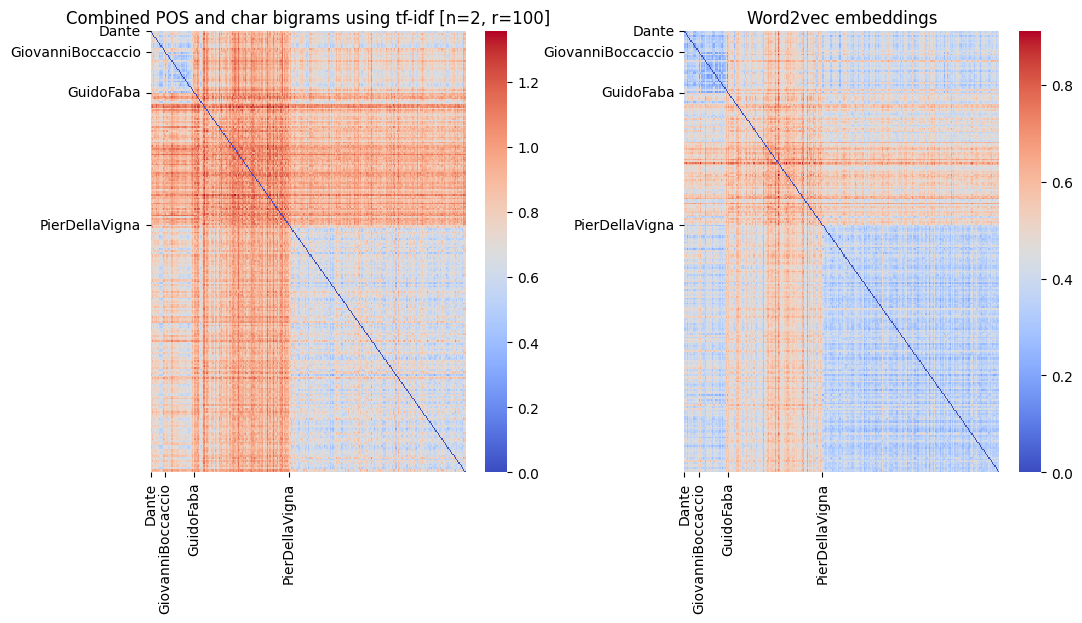

In [3]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
plt.tight_layout(w_pad=7)

sns.heatmap(pairwise_distances(medlatin_tfidf), cmap='coolwarm', ax=axes[0])
axes[0].set_title(f'Combined POS and char bigrams using tf-idf [n=2, r=100]')
axes[0].set_yticks(author_idx)
axes[0].set_yticklabels(author_names)
axes[0].set_xticks(author_idx)
axes[0].set_xticklabels(author_names)

sns.heatmap(pairwise_distances(medlatin_emb), cmap='coolwarm', ax=axes[1])
axes[1].set_title(f'Word2vec embeddings')
axes[1].set_yticks(author_idx)
axes[1].set_yticklabels(author_names)
axes[1].set_xticks(author_idx)
axes[1].set_xticklabels(author_names);

### Show concordance rates

In [5]:
# the default number of repeats is 100
kmeans_tfidf = medlatin.repeat_kmeans(medlatin_tfidf, clusters=4)
kmeans_emb = medlatin.repeat_kmeans(medlatin_emb, clusters=4)
concordance_tfidf = medlatin.concordance_heatmap(kmeans_tfidf)
concordance_emb = medlatin.concordance_heatmap(kmeans_emb)

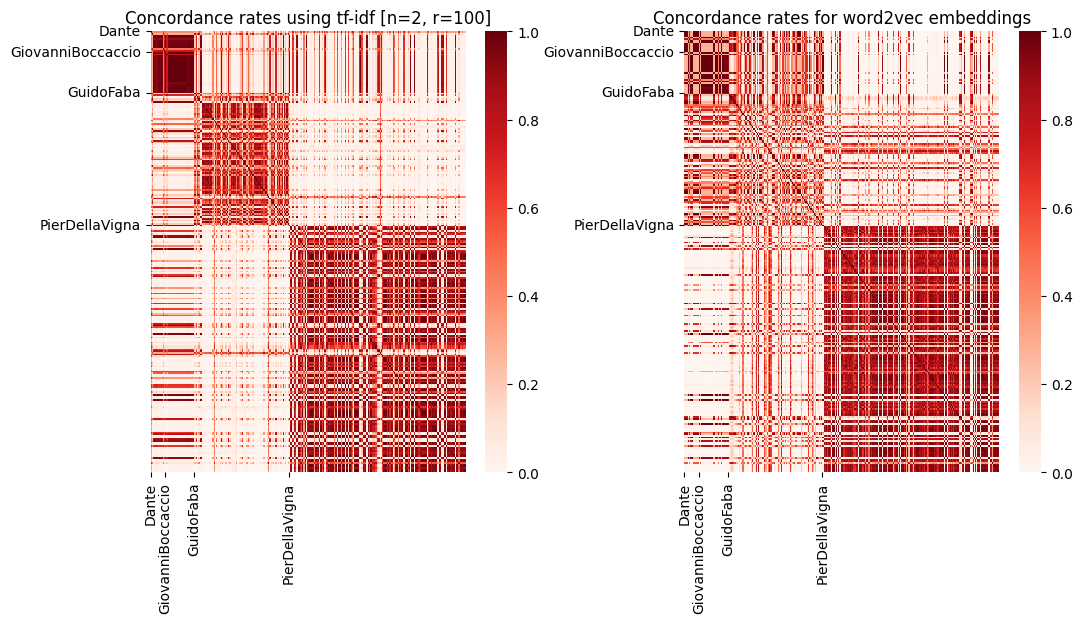

In [6]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
plt.tight_layout(w_pad=7)

sns.heatmap(concordance_tfidf, cmap='Reds', ax=axes[0])
axes[0].set_title(f'Concordance rates using tf-idf [n=2, r=100]')
axes[0].set_yticks(author_idx)
axes[0].set_yticklabels(author_names)
axes[0].set_xticks(author_idx)
axes[0].set_xticklabels(author_names)

sns.heatmap(concordance_emb, cmap='Reds', ax=axes[1])
axes[1].set_title(f'Concordance rates for word2vec embeddings')
axes[1].set_yticks(author_idx)
axes[1].set_yticklabels(author_names)
axes[1].set_xticks(author_idx)
axes[1].set_xticklabels(author_names);